This dataset is from the mavenanalytics.io website. In this project, we will be analyzing a quarter's worth of orders from a fictitious restaurant serving international cuisisne, including the date and time of each order, the itmes ordered, and additional details on the type, name, and price of the items. 

Objective: The owner of the restaurant has reached out to us and asked us to comb through the data to identify any trends and to answer a few business questions. This task will completed by utilizing the power of python and its packages. 

Questions:

What were the least and most ordered items?

What categories weer they in?

What do the highest spent orders look like?

Which items did they buy and how much did they spend?

Were there certain times that had more or less orders?

Which cuisines should we focus on developing more menu items for based on the data?




###### Lets begin with importing the neccessary libraries for proper analysis.

In [4]:
import numpy as np
import pandas as pd   
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import matplotlib.pyplot as plt                
from matplotlib import style 
style.use("ggplot")
%matplotlib inline 
import seaborn as sns   
sns.set_style("darkgrid")

For this project, there are two different datasets that are associated with it. I will read those datasets into a dataframe and view the first and last three rows of that data to check for consistency.

In [5]:
menu_items = pd.read_csv(r"C:\Users\mjaso\Downloads\Restaurant+Orders+CSV_Project\menu_items.csv")
order_details = pd.read_csv(r"C:\Users\mjaso\Downloads\Restaurant+Orders+CSV_Project\order_details.csv")

In [6]:
menu_items.head(3)

,menu_item_id,item_name,category,price
0,101,Hamburger,American,12.95
1,102,Cheeseburger,American,13.95
2,103,Hot Dog,American,9.00


In [7]:
menu_items.tail(3)

,menu_item_id,item_name,category,price
29,130,Shrimp Scampi,Italian,19.95
30,131,Chicken Parmesan,Italian,17.95
31,132,Eggplant Parmesan,Italian,16.95


In [8]:
order_details.head(3)

,order_details_id,order_id,order_date,order_time,item_id
0,1,1,1/1/23,11:38:36 AM,109.0
1,2,2,1/1/23,11:57:40 AM,108.0
2,3,2,1/1/23,11:57:40 AM,124.0


In [9]:
order_details.tail(3)

,order_details_id,order_id,order_date,order_time,item_id
12231,12232,5369,3/31/23,10:05:04 PM,120.0
12232,12233,5369,3/31/23,10:05:04 PM,122.0
12233,12234,5370,3/31/23,10:15:48 PM,122.0


Before I begin my analysis, I will check to make sure all of my datatypes are in the correct format. If there are any neccessary changes, I will do my data cleaning and transformation before proceeding.

I'll begin by checking the datatypes of each dataset.

In [10]:
menu_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


All datatypes are correct for the first dataset, I will look into the second dataset.

In [11]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  12234 non-null  int64  
 1   order_id          12234 non-null  int64  
 2   order_date        12234 non-null  object 
 3   order_time        12234 non-null  object 
 4   item_id           12097 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 478.0+ KB


So the 'order_date', 'order_time", and 'item_id' columns are formatted with the wrong datatype. I will need to utilize pandas datetime function to correct those.

In [12]:
order_details["order_date"] = pd.to_datetime(order_details["order_date"])
order_details["order_time"] = pd.to_datetime(order_details["order_time"])
order_details["item_id"].replace("NULL", " ", regex=True)
order_details["item_id"] = order_details["item_id"].replace(" ", "").astype(float)
order_details.dropna(subset=["item_id"], inplace=True)
order_details["item_id"] = order_details["item_id"].astype(int)

I will now check for verification

In [13]:
order_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12097 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12097 non-null  int64         
 1   order_id          12097 non-null  int64         
 2   order_date        12097 non-null  datetime64[ns]
 3   order_time        12097 non-null  datetime64[ns]
 4   item_id           12097 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(2)
memory usage: 519.8 KB


All datatypes are now in the correct format, I can now continue with analyzing my data and moving on to answering the business questions. 

First, I want to get some more information from the data to get a better understanding of what I am looking at. I'll look at some statistical information from both datasets to begin. 

In [14]:
menu_items.describe()

,menu_item_id,price
count,32.000000,32.000000
mean,116.500000,13.285937
std,9.380832,3.858071
min,101.000000,5.000000
25%,108.750000,10.500000
50%,116.500000,13.950000
75%,124.250000,15.750000
max,132.000000,19.950000


In [15]:
menu_items.describe(include="object")

,item_name,category
count,32,32
unique,32,4
top,Hamburger,Mexican
freq,1,9


In [16]:
order_details.describe()

,order_details_id,order_id,item_id
count,12097.000000,12097.000000,12097.000000
mean,6118.950897,2692.569149,115.202282
std,3531.337208,1545.826452,9.387580
min,1.000000,1.000000,101.000000
25%,3064.000000,1353.000000,107.000000
50%,6119.000000,2711.000000,114.000000
75%,9175.000000,4020.000000,123.000000
max,12234.000000,5370.000000,132.000000


I now have a better understanding of the numerical and categorical variable within both of the datasets. 

I'll continue on with checking for duplicate values in both datasets.

In [17]:
menu_items_duplicates = menu_items.duplicated().sum()
print(f"There are {menu_items_duplicates} rows of data in the menu_items dataset.")

There are 0 rows of data in the menu_items dataset.


In [18]:
order_details_duplicates = order_details.duplicated().sum()
print(f"There are {order_details_duplicates} rows of data in the order_details dataset.")

There are 0 rows of data in the order_details dataset.


Now I'll check for any null values in either dataset, as they can cause complications in accurate analysis.

In [19]:
for null in menu_items.columns:
    null_val = menu_items[null].isnull().sum()
    print(f"There are {null_val} null values in the column {null}.")

There are 0 null values in the column menu_item_id.
There are 0 null values in the column item_name.
There are 0 null values in the column category.
There are 0 null values in the column price.


In [20]:
for na in order_details.columns:
    na_val = order_details[na].isna().sum()
    print(f"There are {na_val} n/a values in the column {na}.")

There are 0 n/a values in the column order_details_id.
There are 0 n/a values in the column order_id.
There are 0 n/a values in the column order_date.
There are 0 n/a values in the column order_time.
There are 0 n/a values in the column item_id.


I will now check for all unique values within both datasets

In [21]:
for unique in menu_items.columns:
    unique_vals = menu_items[unique].nunique()
    print(f"There are {unique_vals} unique values in the column {unique}.")

There are 32 unique values in the column menu_item_id.
There are 32 unique values in the column item_name.
There are 4 unique values in the column category.
There are 14 unique values in the column price.


In [22]:
for unique in order_details.columns:
    unique_vals = order_details[unique].nunique()
    print(f"There are {unique_vals} unique values in the column {unique}.")

There are 12097 unique values in the column order_details_id.
There are 5343 unique values in the column order_id.
There are 90 unique values in the column order_date.
There are 4985 unique values in the column order_time.
There are 32 unique values in the column item_id.


I now have a better understanding of the datasets that I am working with and all of my data cleaning has been performed. The datasets are now ready for analysis.

Time to answer the business questions.

1) What were the least and most ordered items?

In [23]:
order_details.rename(columns={"item_id": "menu_item_id"}, inplace=True) 

order_details_menu_items = pd.merge(order_details, menu_items, 
                                    how="inner",
                                    on="menu_item_id")
order_details_menu_items.head(1)

,order_details_id,order_id,order_date,order_time,menu_item_id,item_name,category,price
0,1,1,2023-01-01,2024-04-18 11:38:36,109,Korean Beef Bowl,Asian,17.95


In [93]:
most_least_ordered = order_details_menu_items.groupby("item_name").nunique()["order_id"].sort_values(ascending=False).reset_index()
most_least_ordered = most_least_ordered.loc[(most_least_ordered["order_id"] == 596) | (most_least_ordered["order_id"] == 123)]
most_least_ordered

,item_name,order_id
0,Edamame,596
31,Chicken Tacos,123


I'll put these results in a visual.

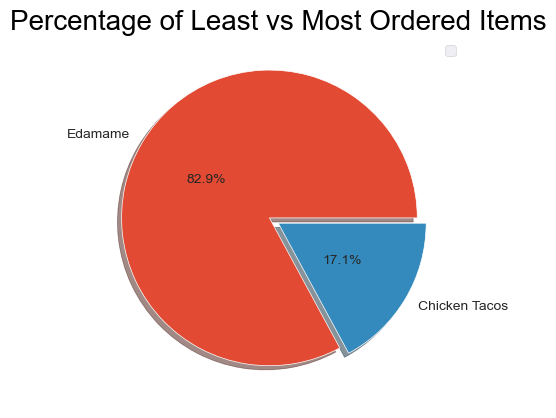

In [103]:
e = [0.07, 0]
plt.pie(most_least_ordered["order_id"],
        labels=most_least_ordered["item_name"],
        autopct="%1.1f%%",
        explode=e,
        shadow=True,
        pctdistance=0.5)
plt.title("Percentage of Least vs Most Ordered Items",
          color="black",
          fontsize=20)
plt.legend("")


2) What categories were they in?

In [104]:
most_least_categories = order_details_menu_items.groupby(["item_name", "category"])["order_id"].nunique().sort_values(ascending=False).reset_index()
most_least_categories.loc[(most_least_categories["order_id"] == 596) | (most_least_categories["order_id"] == 123)]

,item_name,category,order_id
0,Edamame,Asian,596
31,Chicken Tacos,Mexican,123


3) What do the highest spend orders look like?

In [107]:
high = order_details_menu_items.groupby(["item_name", "category"])["order_id"].nunique().sort_values()
high

highest_spent = order_details_menu_items.groupby(["category", "item_name"]).agg(num_of_orders=("order_id", "count"), total_spent=("price", "sum")).sort_values(by=["total_spent"], ascending=[False]).reset_index()
highest_spent[:10]

,category,item_name,num_of_orders,total_spent
0,Asian,Korean Beef Bowl,588,10554.60
1,Italian,Spaghetti & Meatballs,470,8436.50
2,Asian,Tofu Pad Thai,562,8149.00
3,American,Cheeseburger,583,8132.85
4,American,Hamburger,622,8054.90
5,Asian,Orange Chicken,456,7524.00
6,Italian,Eggplant Parmesan,420,7119.00
7,Mexican,Steak Torta,489,6821.55
8,Italian,Chicken Parmesan,364,6533.80
9,Asian,Pork Ramen,360,6462.00


I will visualize these results in a bar graph

The bar graph represents the top 10 highest spent orders by item.


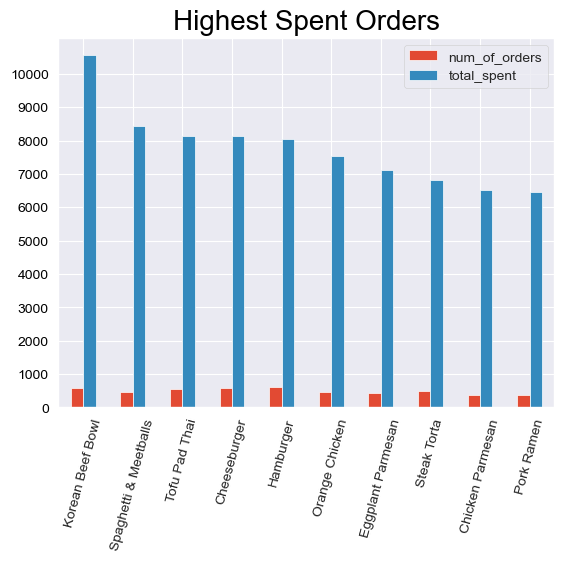

In [120]:
highest_spent[:10].plot(kind="bar",
                        rot=75)
plt.title("Highest Spent Orders",
          color="black",
          fontsize=20)
plt.xticks([0,1,2,3,4,5,6,7,8,9],
           ["Korean Beef Bowl","Spaghetti & Meetballs",
            "Tofu Pad Thai","Cheeseburger","Hamburger",
            "Orange Chicken","Eggplant Parmesan","Steak Torta",
            "Chicken Parmesan","Pork Ramen"])
totals = list(range(0,11000,1000))
plt.yticks(totals,[f"{t}" for t in totals],
           color="black")
print("The bar graph represents the top 10 highest spent orders by item.")

4) Which items did the buy and how much did they spend?

This question can also be answered by the above chart results, which I will display below.

In [121]:
highest_spent

,category,item_name,num_of_orders,total_spent
0,Asian,Korean Beef Bowl,588,10554.60
1,Italian,Spaghetti & Meatballs,470,8436.50
2,Asian,Tofu Pad Thai,562,8149.00
3,American,Cheeseburger,583,8132.85
4,American,Hamburger,622,8054.90
5,Asian,Orange Chicken,456,7524.00
6,Italian,Eggplant Parmesan,420,7119.00
7,Mexican,Steak Torta,489,6821.55
8,Italian,Chicken Parmesan,364,6533.80
9,Asian,Pork Ramen,360,6462.00


5) Were there certain times that had more or less orders?

For this question, I will extract the hour from the time column in the order_details dataset to answer this business question.

In [125]:
order_details["hour"] = order_details["order_time"].dt.hour

In [129]:
times = order_details.groupby(["hour"])["order_details_id"].nunique().sort_values(ascending=False).reset_index()
times.rename(columns={"order_details_id": "num of orders"}, inplace=True)
times

,hour,num of orders
0,12,1659
1,13,1558
2,17,1355
3,18,1290
4,19,1074
5,16,1035
6,14,956
7,20,882
8,15,743
9,11,624


Here is a chart of the top 5 busiest hours.

The graphic shows the top 5 busy hours for the restaurant.


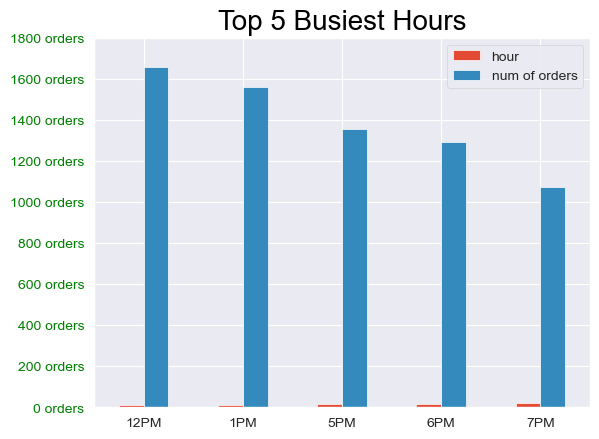

In [137]:
times[:5].plot(kind="bar",
               rot=0)
plt.title("Top 5 Busiest Hours",
          color="black",
          fontsize=20)
plt.xticks([0,1,2,3,4],
           ["12PM","1PM","5PM","6PM","7PM"])
orders = list(range(0,1900,200))
plt.yticks(orders,[f"{o} orders" for o in orders],
           color="green")
print("The graphic shows the top 5 busy hours for the restaurant.")



6) Which cuisines should we focus on developing more menu items for based on the data?

In [140]:
lowest_spent = highest_spent.sort_values(by=["total_spent"], ascending=True)
lowest_spent[:10]

,category,item_name,num_of_orders,total_spent
31,Mexican,Chicken Tacos,123,1469.85
30,Asian,Potstickers,205,1845.00
29,Mexican,Chips & Guacamole,237,2133.00
28,American,Hot Dog,257,2313.00
27,Mexican,Cheese Quesadillas,233,2446.50
26,American,Veggie Burger,238,2499.00
25,Mexican,Steak Tacos,214,2985.30
24,Asian,Edamame,620,3100.00
23,Italian,Cheese Lasagna,207,3208.50
22,Mexican,Chips & Salsa,461,3227.00


Recommendations:

Based on the data, the top 10 lowest spent items on the menu should have the most attention focused on them. These dishes can perhaps benefit from some kind of promotion or recipe change.